In [ ]:
#EDA Project-Forbes Richest People Analaysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#1.Load the file
df=pd.read_csv("/content/archive (1) (1).zip")

In [ ]:
# 2. Print first 5 rows of data
df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [ ]:
# 3. Print last 5 rows of data
df.tail()


,Unnamed: 0,rank,name,networth,age,country,source,industry
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail
2599,2599,2578,Horst-Otto Gerberding,$1 B,69,Germany,flavors and fragrances,Food & Beverage


In [ ]:
# 4. Check for missing ,null values & duplicate data
#missing values
df=df.dropna()
#null values
df.isnull().sum()


,0
Unnamed: 0,0
rank,0
name,0
networth,0
age,0
country,0
source,0
industry,0


In [ ]:
#duplicate data
df.duplicated().sum()

0

In [ ]:
# 5.Get some info on the data set
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


In [ ]:
# 6.Get some description of the data
df.describe()

,Unnamed: 0,rank,age
count,2600.000000,2600.000000,2600.000000
mean,1299.500000,1269.570769,64.271923
std,750.699674,728.146364,13.220607
min,0.000000,1.000000,19.000000
25%,649.750000,637.000000,55.000000
50%,1299.500000,1292.000000,64.000000
75%,1949.250000,1929.000000,74.000000
max,2599.000000,2578.000000,100.000000


In [ ]:
# 7. Get shape of the data
df.shape

(2600, 8)

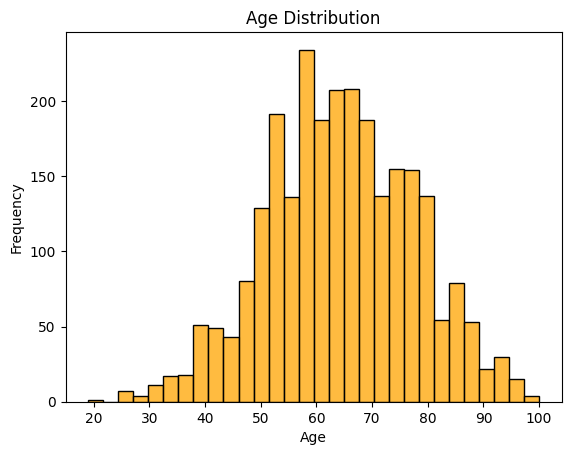

In [ ]:
#Visualization

# 1. Bar plot for 'Age'

sns.histplot (df['age'], bins=30, kde=False,color='orange')

plt.title('Age Distribution')

plt.xlabel('Age')

plt.ylabel('Frequency')

plt.show()


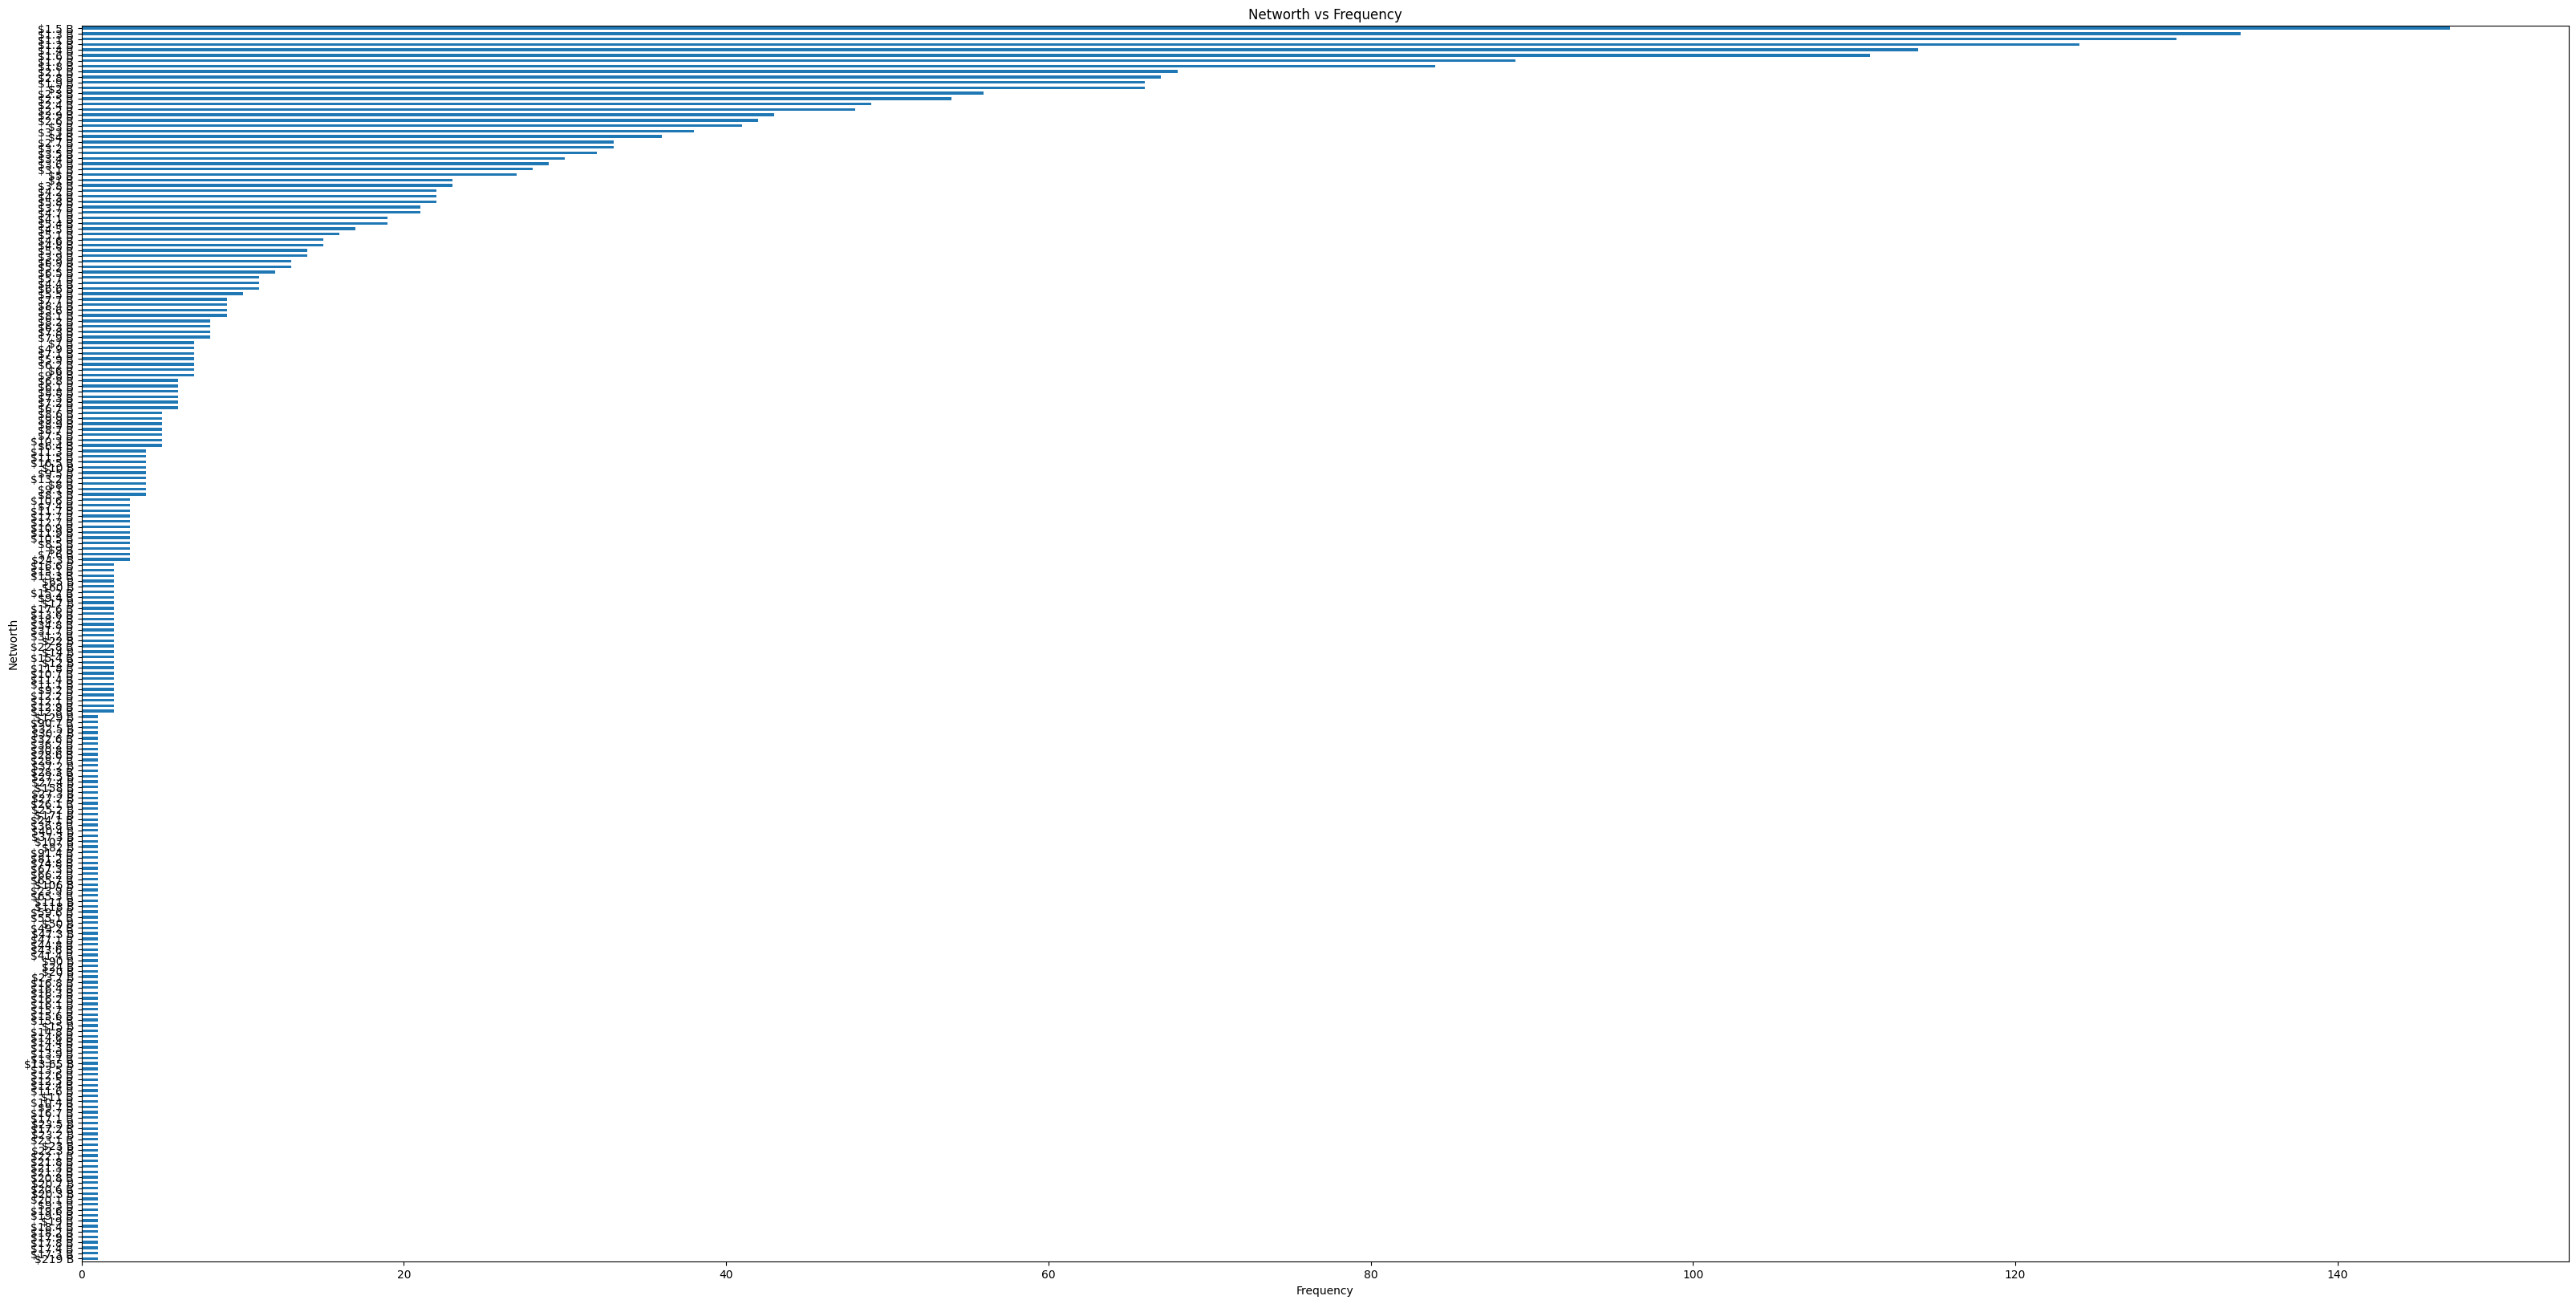

In [ ]:
# 2.Bar plot for Networth vs Frequency
from matplotlib.pyplot import figure
figure(num=None, figsize=(40,20))
df["networth"].value_counts(ascending=True).plot.barh()
plt.title("Networth vs Frequency")
plt.xlabel("Frequency")
plt.ylabel("Networth")
plt.show()

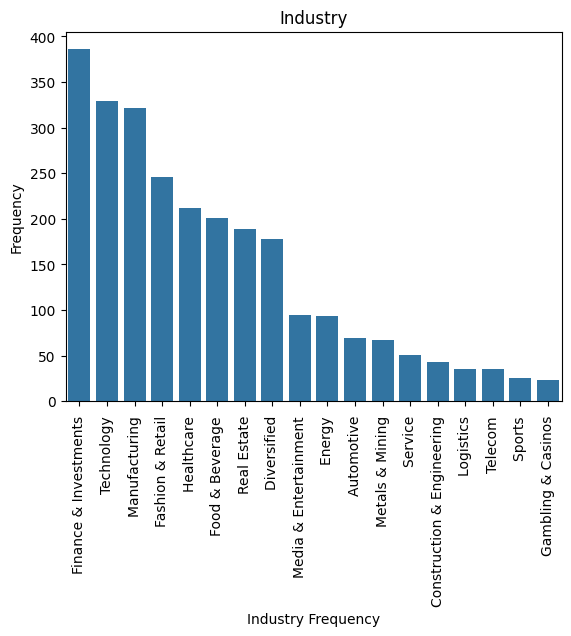

In [ ]:
# 3. Industry frequency

sns.countplot(data=df, x='industry', order=df['industry'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Industry')
plt.xlabel('Industry Frequency')
plt.ylabel('Frequency')
plt.show()

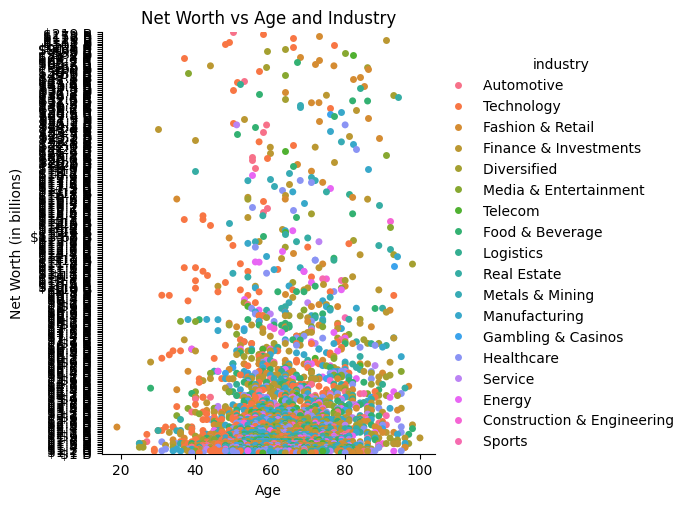

In [ ]:
# 4. Net Worth vs Age and Industry

sns.catplot(x='age', y='networth', hue='industry', data=df)
plt.title('Net Worth vs Age and Industry')
plt.xlabel('Age')
plt.ylabel('Net Worth (in billions)')

plt.show()


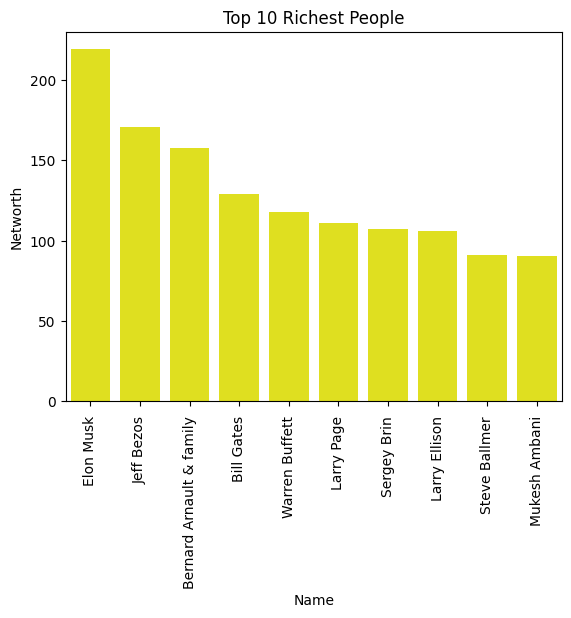

In [ ]:
# 5.Top 10 richest people
top = df.copy()
top['networth'] = top['networth'].str.replace('$', '').str.replace(' B', '').astype(float)
top = top.nlargest(10, 'networth')

sns.barplot(x='name', y='networth', data=top,color='yellow')
plt.title('Top 10 Richest People')
plt.xlabel('Name')
plt.ylabel('Networth')
plt.xticks(rotation=90)
plt.show()

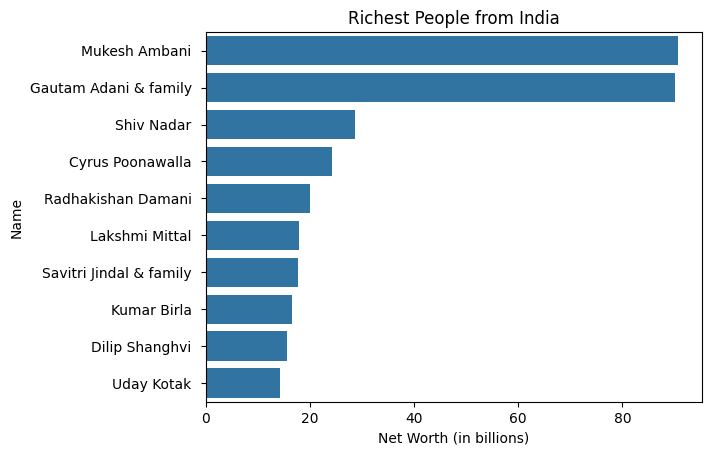

In [ ]:
# 6.Richest people from India

india_richest = df[df['country'] == 'India'].copy()
india_richest['networth'] = india_richest['networth'].str.replace('\n', '').str.replace(' B', '').str.replace('$', '').astype(float)
india_richest = india_richest.nlargest(10, 'networth')

sns.barplot(x='networth', y='name', data=india_richest)
plt.title('Richest People from India')
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Name')
plt.show()

                      name  age                industry
1311  Kevin David Lehmann    19       Fashion & Retail 
2190   Alexandra Andresen    25            Diversified 
1975     Pedro Franceschi    25  Finance & Investments 
2062          Wang Zelong    25        Metals & Mining 
2191   Katharina Andresen    26            Diversified 
...                    ...  ...                     ...
2395         Park Kwan-ho    50  Media & Entertainment 
1572        Evan Williams    50             Technology 
575           Daniel Ziff    50  Finance & Investments 
1485         David Mindus    50            Real Estate 
0               Elon Musk    50             Automotive 

[359 rows x 3 columns]


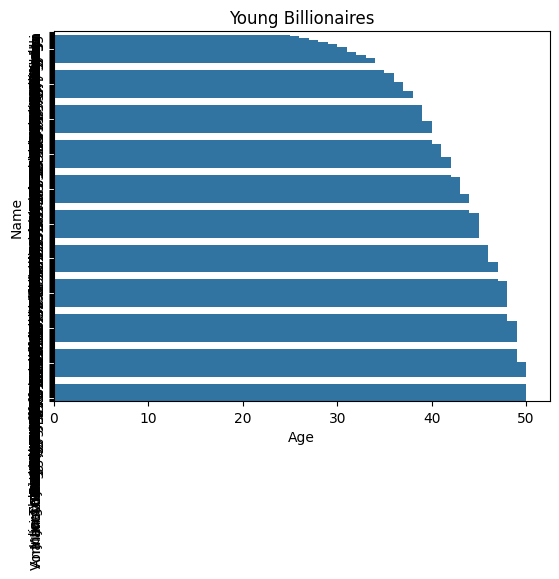

In [ ]:
# 7.Minimum age billionaire <=50
young_billionaires = df[df['age'] <= 50]
young_billionaires = young_billionaires[['name', 'age', 'industry']].sort_values(by='age')
print(young_billionaires)

sns.barplot(x='age', y='name', data=young_billionaires)
plt.title('Young Billionaires')
plt.xlabel('Age')
plt.ylabel('Name')
plt.yticks(rotation=90)

plt.show()


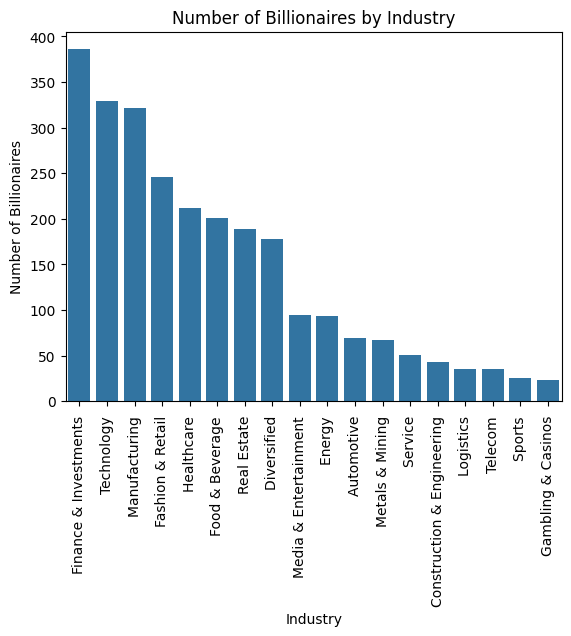

In [ ]:

# 8.Industry with the most billionaires
industry_counts = data['industry'].value_counts()

sns.barplot(x=industry_counts.index, y=industry_counts.values)
plt.title('Number of Billionaires by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Billionaires')
plt.xticks(rotation=90)
plt.show()